<h1>Modelling of HEK293 polysome</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from polan import find_poly_peaks, fit_peaks
def normpdf(x,mu,sigma):
    return 1/(np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-1 * ((x - mu) ** 2 / (2 * sigma ** 2)))

In [2]:
#read in the data file containing the polysome profile
HEK_trace = pd.read_csv('Data/poly_HEK.csv')
#ensure that data are in ascending x axis order
HEK_trace = HEK_trace.sort_values('x')
#normalise x axis 
HEK_trace.x = HEK_trace.x / max(HEK_trace.x)
#detect well separated peaks
autopeaks = np.asarray(find_poly_peaks(HEK_trace))
#extrapolate additional peaks up to gradient end
extrapeaks,peakfun = fit_peaks(autopeaks,0.99,mode=0.37)

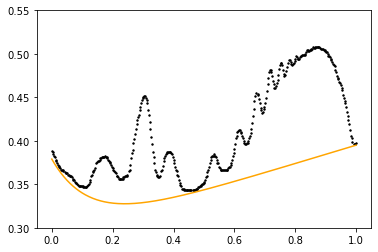

In [3]:
#adjust drift
x = np.linspace(0,1,num=400)
#define the baseline drifts: 
#'debris' represents the initial debris peak
debris = np.exp((-x)*8)*0.09
#'drift' represent the absorption of the sucrose gradient
drift = 0.289 + 0.106*x

baseline = drift + debris

plt.close()
fig,ax = plt.subplots()
ax.set_ylim((0.3,0.55))
ax.scatter(HEK_trace.x,HEK_trace.y,s=2,c='black')
ax.plot(x,baseline,c ='orange')
plt.show()

In [4]:
#list of peak locations
peak_locs = [0.177, 0.30, 0.385, 0.53, 0.615, 0.675, 0.72, 0.753, 0.78, 0.806, 0.828, 0.8495, 0.868, 0.885, 0.90, 0.915, 0.929, 0.941, 0.953, 0.964, 0.974, 0.984]
#list of peak widths.These were manually adjusted to achieve a good fit in the figure below.
peak_widths = [0.0357, 0.0255, 0.024, 0.0195, 0.0214, 0.0175, 0.015, 0.012, 0.012, 0.012, 0.011, 0.011, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009]
#list of peak scaling factors. These were manually adjusted to achieve a good fit in the figure below.
peak_scales = [0.0048, 0.008, 0.0033, 0.0019, 0.0032, 0.004, 0.004, 0.0032, 0.003, 0.003, 0.00255, 0.00265, 0.002, 0.00195, 0.0018, 0.0017, 0.0013, 0.00097, 0.00079, 0.00043, 0.00035, 0.00036, 0.00036]

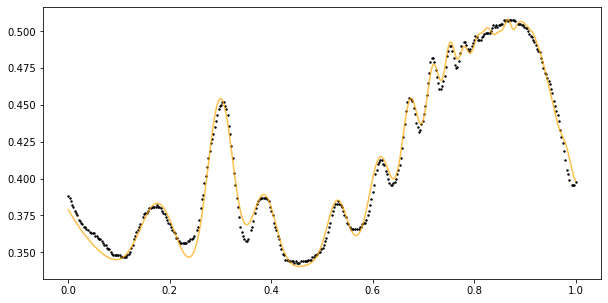

In [5]:
factor = 0.95
n = 1
#peak_widths[n] = peak_widths[n] * factor; peak_scales[n] = peak_scales[n] * factor
#peak_scales[n] = peak_scales[n] * factor
#peak_locs[n] = peak_locs[n] * factor
#generate a vector of values for the x-axis, starting after the initial debris peak

#construct peaks
indiv_traces = []
sum_trace = drift+debris
for loc in range(len(peak_locs)):
    this_peak = normpdf(x,peak_locs[loc],peak_widths[loc])*peak_scales[loc]
    indiv_traces.append(this_peak)
    sum_trace += this_peak
plt.close()
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(HEK_trace.x,HEK_trace.y,s=2,c='black')
ax.plot(x,sum_trace,c='orange',alpha=0.7)
plt.show()

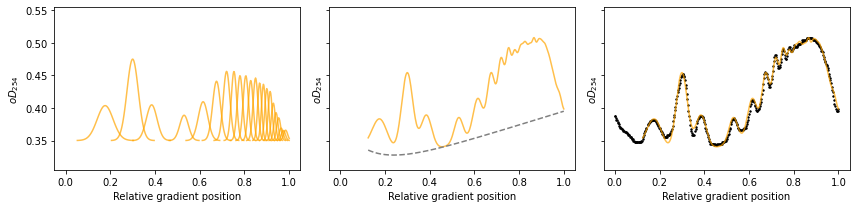

In [6]:
fig,ax = plt.subplots(1,3,figsize=(12,3),sharex=True,sharey=True)
#plot separated Gaussians
display_limit = 0.0001
for n in range(len(indiv_traces)):
    y = indiv_traces[n]
    ax[0].plot(x[y >= display_limit], y[y >= display_limit]+0.35, c='orange',alpha=0.7)
ax[0].set_xlabel('Relative gradient position')
ax[0].set_ylabel(r'$oD_{254}$')
#plot fitted trace
ax[1].plot(x[50:],sum_trace[50:],c='orange',alpha=0.7)
ax[1].plot(x[50:],(drift+debris)[50:],c='grey',linestyle='--')
ax[1].set_ylim((-0.05,0.85))
ax[1].set_xlabel('Relative gradient position')
ax[1].set_ylabel(r'$oD_{254}$')
#plot overlay
ax[2].scatter(HEK_trace['x'],HEK_trace['y'],c='black',s=2)
ax[2].plot(x[50:],sum_trace[50:],c='orange',alpha=0.7)
ax[2].set_ylim((0.305,0.555))
ax[2].set_xlabel('Relative gradient position')
ax[2].set_ylabel(r'$oD_{254}$')
fig.tight_layout()
#plt.savefig('Supp Figure 2.svg')
plt.show()